In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Read the Excel Listening file into a DataFrame
data_list = pd.read_excel(os.path.join("data", "listings.xlsx"))
data_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17825 entries, 0 to 17824
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            17825 non-null  int64         
 1   listing_url                                   17825 non-null  object        
 2   scrape_id                                     17825 non-null  int64         
 3   last_scraped                                  17825 non-null  datetime64[ns]
 4   name                                          17792 non-null  object        
 5   description                                   17536 non-null  object        
 6   neighborhood_overview                         11705 non-null  object        
 7   picture_url                                   17825 non-null  object        
 8   host_id                                       17825 non-null  int6

,Column Name,Unique Values,Data Type
0,id,17825,int64
1,listing_url,17825,object
2,scrape_id,1,int64
3,last_scraped,6,datetime64[ns]
4,name,17417,object
...,...,...,...
69,calculated_host_listings_count,25,int64
70,calculated_host_listings_count_entire_homes,21,int64
71,calculated_host_listings_count_private_rooms,14,int64
72,calculated_host_listings_count_shared_rooms,4,int64


0     98.0
1     89.0
2    100.0
3     99.0
4     97.0
Name: review_scores_rating, dtype: float64

In [162]:
#
#Tabla de frecuencia:
#Create a new datarfame with unique values and type of each column in the dataframe
data_list_unique = pd.DataFrame({'Column Name': data_list.columns, 'Unique Values': [data_list[col].nunique() for col in data_list.columns], 'Data Type': [data_list[col].dtype for col in data_list.columns]})

print("¿Entre que puntajes está el 53% de las calificaciones de revisión más bajas de la plataforma?")

#Creación de intervalos
intervalos = [20+i*6 for i in range(0, 15)]

#Conteo
conteo,_ = np.histogram(review_scores_rating, bins=intervalos)

#Creación de la tabla de frecuencias
tabla_frecuencias = pd.DataFrame({
    'Intervalo': [f"{intervalos[i]} - {intervalos[i+1]}" for i in range(len(intervalos)-1)],
    'Frecuencia': conteo
})

tabla_frecuencias['Frecuencia Acumulada'] = tabla_frecuencias['Frecuencia'].cumsum()
tabla_frecuencias['Frecuencia Relativa'] = tabla_frecuencias['Frecuencia'] / tabla_frecuencias['Frecuencia'].sum()
tabla_frecuencias['Frecuencia Relativa Acumulada'] = tabla_frecuencias['Frecuencia Relativa'].cumsum()
tabla_frecuencias['Frecuencia Relativa Porcentual %'] = tabla_frecuencias['Frecuencia Relativa'] * 100
tabla_frecuencias['Frecuencia Relativa Porcentual Acumulada %'] = tabla_frecuencias['Frecuencia Relativa Acumulada'] * 100
tabla_frecuencias = tabla_frecuencias.round(4)
print("\nTabla de frecuencias:")
print("Entre 20 a 98 puntos se encuentra el 53% de las calificaciones de revisión más bajas de la plataforma.")
tabla_frecuencias

¿Entre que puntajes está el 53% de las calificaciones de revisión más bajas de la plataforma?

Tabla de frecuencias:
Entre 20 a 98 puntos se encuentra el 53% de las calificaciones de revisión más bajas de la plataforma.


,Intervalo,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada,Frecuencia Relativa Porcentual %,Frecuencia Relativa Porcentual Acumulada %
0,20 - 26,24,24,0.0016,0.0016,0.1580,0.1580
1,26 - 32,0,24,0.0000,0.0016,0.0000,0.1580
2,32 - 38,1,25,0.0001,0.0016,0.0066,0.1646
3,38 - 44,22,47,0.0014,0.0031,0.1449,0.3095
4,44 - 50,2,49,0.0001,0.0032,0.0132,0.3226
5,50 - 56,8,57,0.0005,0.0038,0.0527,0.3753
6,56 - 62,96,153,0.0063,0.0101,0.6321,1.0074
7,62 - 68,27,180,0.0018,0.0119,0.1778,1.1852
8,68 - 74,78,258,0.0051,0.0170,0.5136,1.6988
9,74 - 80,57,315,0.0038,0.0207,0.3753,2.0741


In [163]:
#PRICE

Price = data_list['price'].dropna()
Price = Price[Price > 0]  # Eliminar valores nulos y ceros

#Calcular la tabla de percentiles del 1 a 100.
percentiles = [i for i in range(1, 101)] 
percentiles_values = np.percentile(Price, percentiles)
tabla_percentiles = pd.DataFrame({
    'Percentil': percentiles,
    'Price': percentiles_values
})
print("¿Cuál es el precio promedio de alquiler de un inmueble qué se situé por encima del 78%?")
print("El promedio de alquiles de estos inmuebles es de: ", tabla_percentiles[(tabla_percentiles["Percentil"]>78) & (tabla_percentiles["Percentil"]<100)]["Price"].mean())
tabla_percentiles[tabla_percentiles["Percentil"]>78]

¿Cuál es el precio promedio de alquiler de un inmueble qué se situé por encima del 78%?
El promedio de alquiles de estos inmuebles es de:  276.86857142857116


,Percentil,Price
78,79,199.00
79,80,200.00
80,81,200.00
81,82,200.00
82,83,206.00
83,84,215.00
84,85,220.00
85,86,225.00
86,87,235.00
87,88,248.00


In [165]:
print("¿Qué porcentaje de inmuebles en la ciudad se alquilan por debajo del promedio de la ciudad? ")

mean_ = Price.mean()
tbl = tabla_percentiles[tabla_percentiles["Price"]<mean_]
print(f"\nEl procentaje de inmbueles en la ciudad se alquinal por debajo del promeido es del: {tbl["Percentil"].max()}%")
tbl

¿Qué porcentaje de inmuebles en la ciudad se alquilan por debajo del promedio de la ciudad? 

El procentaje de inmbueles en la ciudad se alquinal por debajo del promeido es del: 66%


,Percentil,Price
0,1,33.00
1,2,40.00
2,3,48.00
3,4,50.00
4,5,55.00
...,...,...
61,62,150.00
62,63,150.00
63,64,150.00
64,65,150.00


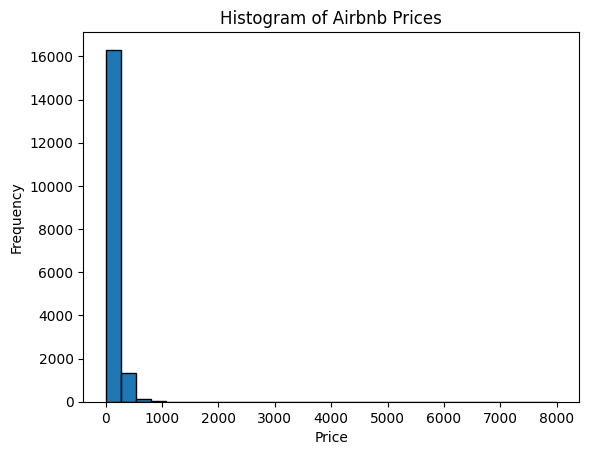

In [155]:
#Create a histogram of Price
plt.hist(Price, bins=30, edgecolor='black')
plt.title('Histogram of Airbnb Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

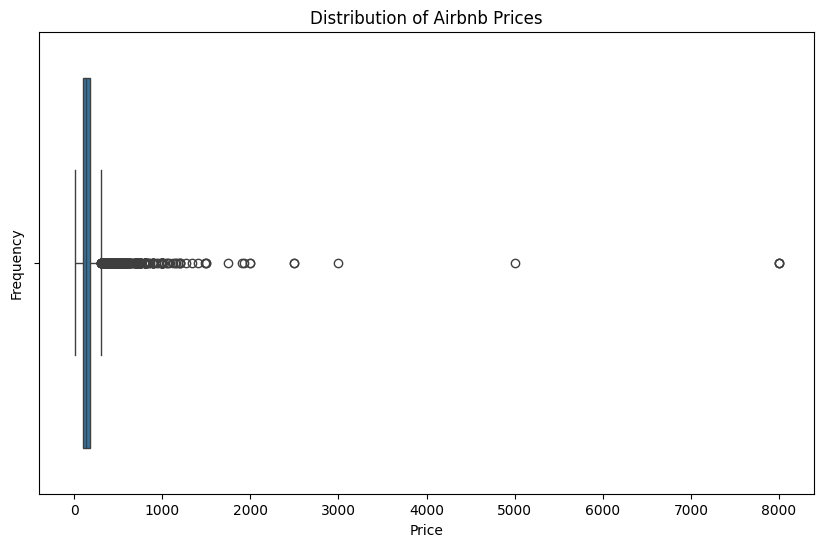

In [156]:
#Create a boxplot of Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=Price)
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

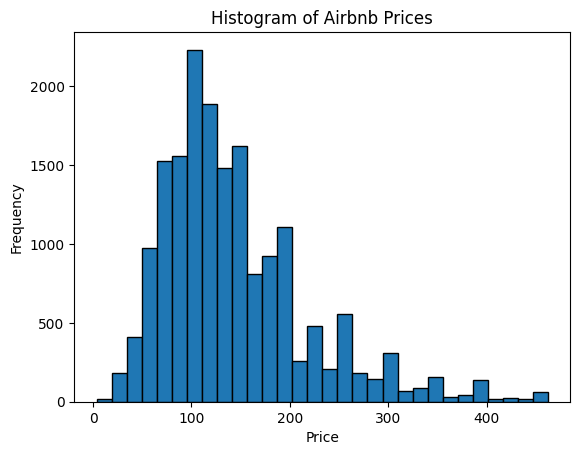

In [157]:
#Delete outliers of 3 standard deviations
three_std_dev = Price.mean() + 2 * Price.std()
Price_ = Price[Price < three_std_dev]
plt.hist(Price_, bins=30, edgecolor='black')
plt.title('Histogram of Airbnb Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

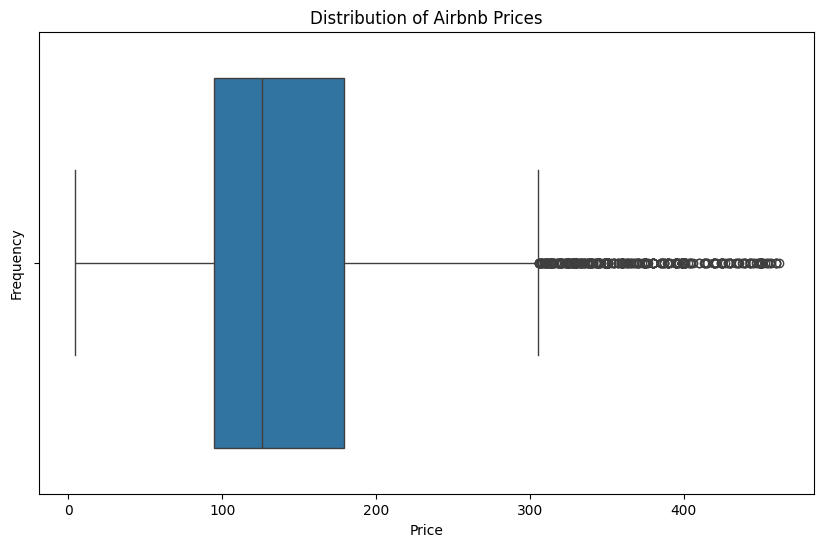

In [141]:
#Create a boxplot to visualize the distribution of prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=Price_)
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [172]:
print("Se desea alquilar un inmueble en la ciudad de Ámsterdam que sea 100 euros \nmás costoso que el promedio distrital, ¿a cuantas desviaciones estaría este inmueble del \npromedio global?")

std_dev = Price.std()
mean_district = mean_ + 100
z_score = (mean_district-mean_) / (std_dev)

print("El valor buscado se encuentra a", round(z_score,0), "desviaciones estándar del promedio global.")

Se desea alquilar un inmueble en la ciudad de Ámsterdam que sea 100 euros 
más costoso que el promedio distrital, ¿a cuantas desviaciones estaría este inmueble del 
promedio global?
El valor buscado se encuentra a 1.0 desviaciones estándar del promedio global.
